In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Obter os dados dos arquivos train e test
train_file = "/home/caio/dxzl-academy/data-science/titanic-kaggle/csv-files/train.csv"
test_file = "/home/caio/dxzl-academy/data-science/titanic-kaggle/csv-files/test.csv"
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [3]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S


In [4]:
test_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
90,982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S
293,1185,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S
285,1177,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q


In [5]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [7]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


In [8]:
train_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test_data.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [10]:
print(train_data.Cabin.describe())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object


In [11]:
print(train_data['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [12]:
train_data.Cabin.isnull()

PassengerId
1       True
2      False
3       True
4      False
5       True
       ...  
887     True
888    False
889     True
890    False
891     True
Name: Cabin, Length: 891, dtype: bool

In [13]:
train_data.Cabin.isnull().sum()/len(train_data) * 100

77.10437710437711

In [14]:
# Selecione apenas colunas numéricas
numeric_data = train_data.select_dtypes(include=['number'])

# Calcule a assimetria (skew) das colunas numéricas
skewness = numeric_data.skew()
print(skewness)


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64


In [15]:
train_data.Pclass.skew()

-0.6305479068752845

In [16]:
train_data.Survived.skew()

0.4785234382949897

In [17]:
#Pclass
print('*' * 20, "Número de passageiros por classe", '*' * 20)
print(train_data['Pclass'].value_counts())

#Sex
print('*' * 20, "Passageiros por sexo", '*' * 20)
print(train_data['Sex'].value_counts())

#Embarked
print('*' * 20, "Número de passageiros que embarcaram em cada porto", '*' * 20)
print(train_data['Embarked'].value_counts())

******************** Número de passageiros por classe ********************
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
******************** Passageiros por sexo ********************
Sex
male      577
female    314
Name: count, dtype: int64
******************** Número de passageiros que embarcaram em cada porto ********************
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [18]:
#Pclass and sex
print('*' * 20, "Passageiros por sexo e classe", '*' * 20)
table1=pd.crosstab(train_data['Pclass'], train_data['Sex'], margins=True, margins_name='Sum')
print(table1)

#Pclass and embarked
print('*' * 20, "Passageiros por embarque e classe", '*' * 20)
table2=pd.crosstab(train_data['Pclass'], train_data['Embarked'], margins=True, margins_name='Sum')
print(table2)

# Gender and embarked
print('*' * 20, "Passageiros por sexo e embarque", '*' * 20)
table3=pd.crosstab(train_data['Sex'], train_data['Embarked'], margins=True, margins_name='Sum')
print(table3)

******************** Passageiros por sexo e classe ********************
Sex     female  male  Sum
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
Sum        314   577  891
******************** Passageiros por embarque e classe ********************
Embarked    C   Q    S  Sum
Pclass                     
1          85   2  127  214
2          17   3  164  184
3          66  72  353  491
Sum       168  77  644  889
******************** Passageiros por sexo e embarque ********************
Embarked    C   Q    S  Sum
Sex                        
female     73  36  203  312
male       95  41  441  577
Sum       168  77  644  889


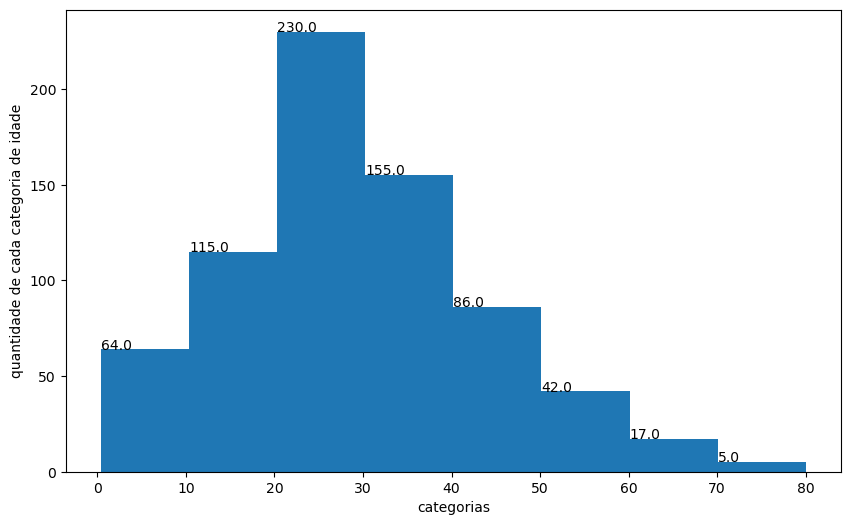

In [19]:
# Age
plt.figure(figsize=(10, 6))
plot = plt.hist(train_data.Age, bins=8, histtype='bar')
plt.ylabel('quantidade de cada categoria de idade')
plt.xlabel('categorias')
for i in range(8): 
    plt.text(plot[1][i], plot[0][i], str(plot[0][i]))

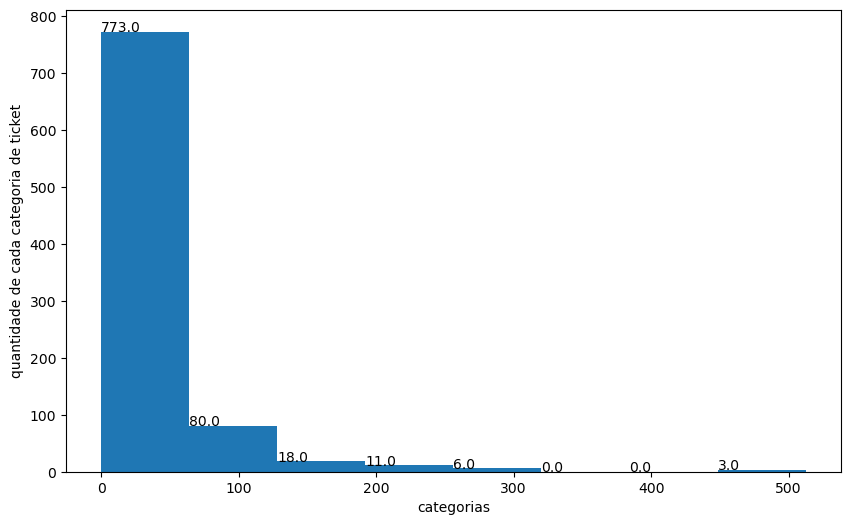

In [20]:
# Ticket
plt.figure(figsize=(10, 6))
plot = plt.hist(train_data.Fare, bins=8, histtype='bar')
plt.ylabel('quantidade de cada categoria de ticket')
plt.xlabel('categorias')
for i in range(8): 
    plt.text(plot[1][i], plot[0][i], str(plot[0][i]))